<a href="https://colab.research.google.com/github/KoushikProject/Data_Visualizations/blob/main/SentimentMovieReview_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("movie1.csv")
df.head()

,Customer,Movie,Feedback
0,A,Avatar2,Good
1,B,Avatar2,Bad
2,C,Avatar2,Average
3,D,Avatar2,Good


In [ ]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_analysis(tweet):
    def getSubjectivity(text):
        return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
    def getPolarity(text):
        return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
    df['TextBlob_Subjectivity'] = df['Feedback'].apply(getSubjectivity)
    df['TextBlob_Polarity'] = df['Feedback'].apply(getPolarity)
    def getAnalysis(score):
        if score >-1 and score <-0.5:
            return 'Negative'
        elif score > -0.5 and score < 0.5:
            return 'Neutral'
        else:
            return 'Positive'
    df['TextBlob_Analysis'] = df['TextBlob_Polarity'].apply(getAnalysis )
    return tweet

In [ ]:
sentiment_analysis(df)

,Customer,Movie,Feedback,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,A,Avatar2,Good,0.600000,0.70,Positive
1,B,Avatar2,Bad,0.666667,-0.70,Negative
2,C,Avatar2,Average,0.400000,-0.15,Neutral
3,D,Avatar2,Good,0.600000,0.70,Positive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df['TextBlob_Analysis'].value_counts()

Positive    2
Negative    1
Neutral     1
Name: TextBlob_Analysis, dtype: int64

Text(0, 0.5, 'Reviews')

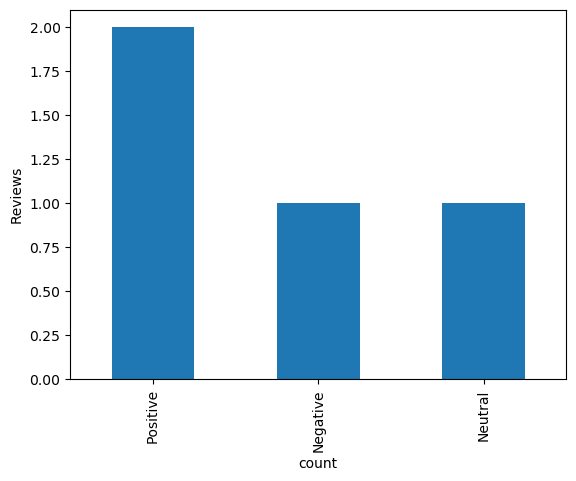

In [ ]:
%matplotlib inline
df['TextBlob_Analysis'].value_counts().plot(kind='bar')
plt.xlabel('count')
# naming the y axis
plt.ylabel('Reviews')

Text(0, 0.5, 'Reviews')

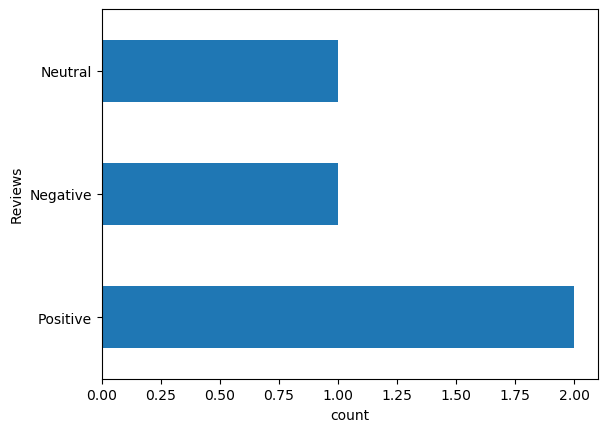

In [ ]:
%matplotlib inline
df['TextBlob_Analysis'].value_counts().plot(kind='barh')
plt.xlabel('count')
# naming the y axis
plt.ylabel('Reviews')

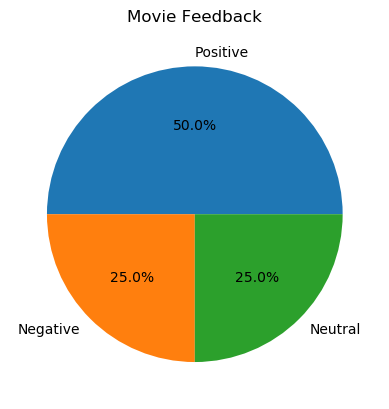

In [ ]:
plt.pie(df['TextBlob_Analysis'].value_counts(), labels=['Positive','Negative','Neutral'], autopct='%1.1f%%')
plt.title('Movie Feedback')
plt.show()

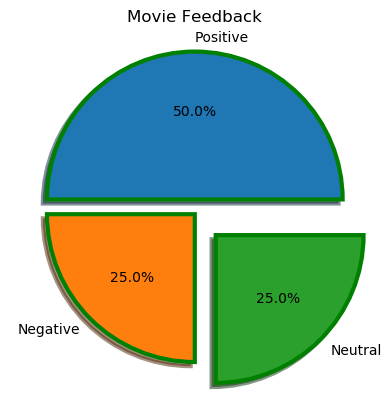

In [ ]:
explode = (0.1, 0.0, 0.2)
wp = { 'linewidth' : 3, 'edgecolor' : "green" }
plt.pie(df['TextBlob_Analysis'].value_counts(), labels=['Positive','Negative','Neutral'], autopct='%1.1f%%',shadow = True,wedgeprops = wp,explode = explode)
plt.title('Movie Feedback')
plt.show()

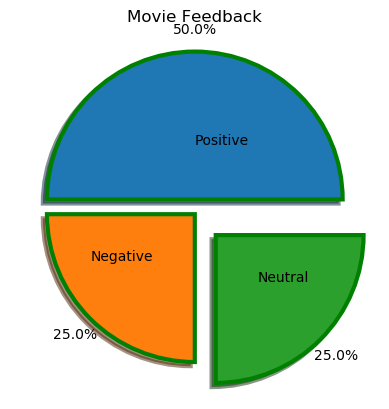

In [ ]:
explode = (0.1, 0.0, 0.2)
wp = { 'linewidth' : 3, 'edgecolor' : "green" }
plt.pie(df['TextBlob_Analysis'].value_counts(), labels=['Positive','Negative','Neutral'], 
        autopct='%1.1f%%',shadow = True,wedgeprops = wp,explode = explode,pctdistance=1.15, labeldistance=.4)
plt.title('Movie Feedback')
plt.show()